Given function is: \\
\begin{align}
q(x) = 1000(x_2 - x_1^2)^2 + (2 - x_1)^2
\end{align}

**1 SOLUTION :**

In [ ]:
import numpy as np 

In [ ]:
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 1000*(x[1]-(x[0])**2)**2 + (2-x[0])**2

In [ ]:
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([-4000*x[0]*x[1]+4000*x[0]**3+2*x[0]-4, 2000*(x[1]-x[0]**2)])

In [ ]:
# module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  gr_t = np.matrix.transpose(gradf)
  #implement the backtracking line search
  while evalf(np.add(x,-alpha*gradf)) > evalf(x)-gamma*alpha*np.matmul(gr_t, gradf):
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [ ]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x , k , evalf(x)


In [ ]:
my_start_x = np.array([5.0,5.0])
my_tol= 1e-9

x_opt, k, f_value = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, 0.5,0.5)
print(x_opt, k , f_value)

[2.         4.00000001] 428277 4.2042719010748794e-18


**1. ANSWER :** \\
**Minimizer = [2.   ,      4.00000001]** \\
**Interations = 428277** \\
**Function value = 4.2042719010748794e-18**

**2. ANSWER :** \\
Yes, we can use the exact line search idea to to find a closed form expression for optimal value of ita. \\

**5 SOLUTION:** \\


In [ ]:
# Backtracking line search for different alpha values.

my_start_x = np.array([5.0,5.0])
my_tol= 1e-9
alpha_list = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]  # alpha values vary over this list.
iterations_bls = []

for alpha_start in alpha_list:
  x_opt_bls, k, f_value = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, 0.5, 0.5)
  iterations_bls.append(k)
  print('for alpha = ',alpha_start, ', iter:', k, ', x: ',x_opt_bls, 'f(x): ', f_value)

for alpha =  1 , iter: 428277 , x:  [2.         4.00000001] f(x):  4.2042719010748794e-18
for alpha =  0.9 , iter: 337016 , x:  [2.         4.00000001] f(x):  4.221854270889351e-18
for alpha =  0.75 , iter: 1854242 , x:  [2.         4.00000001] f(x):  3.894106435316049e-18
for alpha =  0.6 , iter: 1548125 , x:  [2.         4.00000001] f(x):  4.079051493600871e-18
for alpha =  0.5 , iter: 428277 , x:  [2.         4.00000001] f(x):  4.2042719010748794e-18
for alpha =  0.4 , iter: 1977018 , x:  [2.         4.00000001] f(x):  4.070322448056296e-18
for alpha =  0.25 , iter: 428277 , x:  [2.         4.00000001] f(x):  4.2042719010748794e-18
for alpha =  0.1 , iter: 1977018 , x:  [2.         4.00000001] f(x):  4.070322448056296e-18
for alpha =  0.01 , iter: 1696427 , x:  [2.         4.00000001] f(x):  3.959883122148357e-18


In [ ]:
iterations_bls

[428277, 337016, 1854242, 1548125, 428277, 1977018, 428277, 1977018, 1696427]

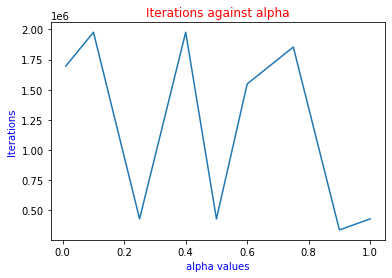

In [ ]:
#plotting the number of iterations against alpha values.
import matplotlib.pyplot as plt
#plt.figure(figsize=(width,height))
plt.plot(alpha_list, iterations_bls)
plt.xlabel('alpha values',color='b')
plt.ylabel('Iterations',color='b')
plt.title('Iterations against alpha',color='r')
plt.show()

**Comments :** \\
1. from the above graph it is obvious that the number of iterations corresponding to increasing aplha value keeps increasing and decreasing alternatively. \\
2. Minimizers remain same for all alpha values.
3. function value keeps increasing and decreasing alternatively for increasing alpha values.

**6. SOLUTION :**

In [ ]:
# Backtracking line search for different rho values.

my_start_x = np.array([5.0,5.0])
my_tol= 1e-9
rho_list = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iterat_bls = []

for rho in rho_list:
  x_opt_bls, k, f_value = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, rho, 0.5)
  iterat_bls.append(k)
  print('for rho = ',rho, ', iterations = ', k, ', minimizer = ',x_opt_bls,', f(x) = ', f_value)

for rho =  0.9 , iterations =  90958 , minimizer =  [2.         4.00000001] , f(x) =  3.986423330282162e-18
for rho =  0.8 , iterations =  448754 , minimizer =  [2.         4.00000001] , f(x) =  4.178490608612969e-18
for rho =  0.75 , iterations =  1098963 , minimizer =  [2.         4.00000001] , f(x) =  4.163475306424951e-18
for rho =  0.6 , iterations =  1220979 , minimizer =  [2.         4.00000001] , f(x) =  4.019097494976119e-18
for rho =  0.5 , iterations =  428277 , minimizer =  [2.         4.00000001] , f(x) =  4.2042719010748794e-18
for rho =  0.4 , iterations =  2141802 , minimizer =  [2.         4.00000001] , f(x) =  3.9783933047262895e-18
for rho =  0.25 , iterations =  2900826 , minimizer =  [2.         4.00000001] , f(x) =  3.507994818997934e-18
for rho =  0.1 , iterations =  4201581 , minimizer =  [2.         4.00000001] , f(x) =  3.613085439337652e-18
for rho =  0.01 , iterations =  34710646 , minimizer =  [2.         4.00000001] , f(x) =  3.0920230644740037e-18


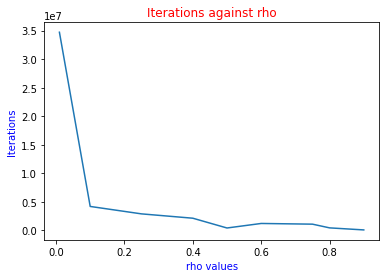

In [ ]:
#Plotting Iterations against rho value.
import matplotlib.pyplot as plt
#plt.figure(figsize=(width,height))
plt.plot(rho_list, iterat_bls)
plt.xlabel('rho values',color='b')
plt.ylabel('Iterations',color='b')
plt.title('Iterations against rho',color='r')
plt.show()

**Comments :** \\
1. from the above graph it is clear that for rho value close to zero the number of iterations is very large and the number of iterations decreases as the rho value increases.
2. Minimizers remain same for all rho values whereas the function value keeps fluctuating (i.e. it is not fixed).